In [75]:
import pandas as pd
from statsmodels.tsa.api import SimpleExpSmoothing

import plotly.express as px

In [76]:
df = [7, 0, 10.59, 7.25, 5.2, 6.87, 7.09, 6.68, 16.41, 13.15, 5.18, 6.21, 6.71, 2.83, 10.47, 0.58, 1.19, 4.3, 0, 6.64, 9.07, 10.25, 4.64, 0, 6.9, 2.91, 10.9, 6.91, 3.46]

In [77]:
df

[7,
 0,
 10.59,
 7.25,
 5.2,
 6.87,
 7.09,
 6.68,
 16.41,
 13.15,
 5.18,
 6.21,
 6.71,
 2.83,
 10.47,
 0.58,
 1.19,
 4.3,
 0,
 6.64,
 9.07,
 10.25,
 4.64,
 0,
 6.9,
 2.91,
 10.9,
 6.91,
 3.46]

In [78]:
index = pd.date_range(start='10/1/2021', end='10/29/2021')

In [79]:
data = pd.Series(df, index)

In [80]:
print(data)

2021-10-01     7.00
2021-10-02     0.00
2021-10-03    10.59
2021-10-04     7.25
2021-10-05     5.20
2021-10-06     6.87
2021-10-07     7.09
2021-10-08     6.68
2021-10-09    16.41
2021-10-10    13.15
2021-10-11     5.18
2021-10-12     6.21
2021-10-13     6.71
2021-10-14     2.83
2021-10-15    10.47
2021-10-16     0.58
2021-10-17     1.19
2021-10-18     4.30
2021-10-19     0.00
2021-10-20     6.64
2021-10-21     9.07
2021-10-22    10.25
2021-10-23     4.64
2021-10-24     0.00
2021-10-25     6.90
2021-10-26     2.91
2021-10-27    10.90
2021-10-28     6.91
2021-10-29     3.46
Freq: D, dtype: float64


In [81]:
fig = px.line(data)
fig.show()

In [82]:
ins1 = SimpleExpSmoothing(data).fit(smoothing_level=0.2,optimized=False)
ins_cast1 = ins1.forecast(3).rename('alpha=0.2')

ins2 = SimpleExpSmoothing(data).fit(smoothing_level=0.8,optimized=False)
ins_cast2 = ins2.forecast(3).rename('alpha=0.8')

ins3 = SimpleExpSmoothing(data).fit()
ins_cast3 = ins3.forecast(3).rename('alpha=%s'%ins3.model.params['smoothing_level'])

C:\Users\amin1858\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning:

After 0.13 initialization must be handled at model creation



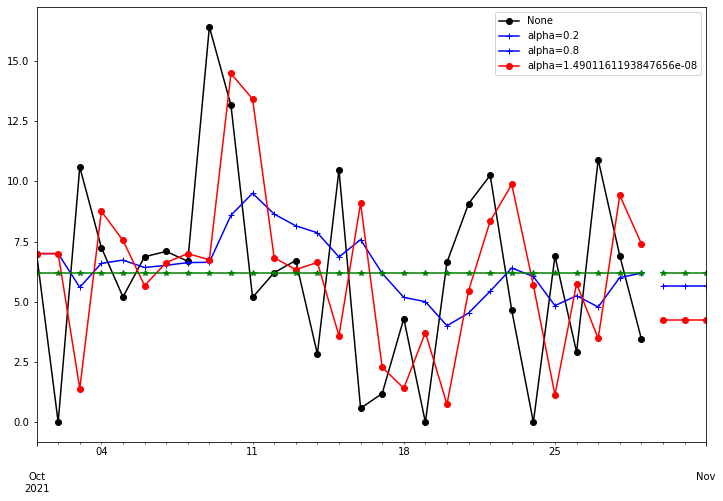

In [83]:
ax = data.plot(marker='o', color='black', figsize=(12,8), legend=True)

#Plot for alpha =0.2
ins_cast1.plot(marker='+', ax=ax, color='blue', legend=True)
ins1.fittedvalues.plot(marker='+', ax=ax, color='blue')

#Plot for alpha = 0.8
ins_cast2.plot(marker='o', ax=ax, color='red', legend=True)
ins2.fittedvalues.plot(marker='o', ax=ax, color='red')

#Plot for alpha=Optimized by statsmodel
ins_cast3.plot(marker='*', ax=ax, color='green', legend=True)
ins3.fittedvalues.plot(marker='*', ax=ax, color='green')

plt.show()